# STELLAR CLASSIFICATION


# Introduction


Astronomi, Dünya'nın atmosferinin ötesindeki evrendeki her şeyin incelenmesi anlamına gelir. Astronomlar, yıldızları spektral özelliklere dayanarak sınıflandırmak için yıldız sınıflandırmasını kullanırlar. Spektral özellikler, astronomlara yıldızlar hakkında daha fazla bilgi çıkarmalarına yardımcı olur. (elementler, sıcaklık, yoğunluk ve manyetik alan gibi)

Galaksilerin, kuasarların ve yıldızların sınıflandırma şeması, astronomideki en temel konulardan biridir. Bu problem, yıldızları, galaksileri ve kuasarları spektral özelliklere dayanarak sınıflandırmayı amaçlamaktadır.

## Content
1. [Python Libraries](#1)
2. [Read and Analyse Data](#2)
6. [Preprocessing](#3)
   * Missing Value
   * Encoding Categorical Features 
   * Train/Test Split
   * Scaling
  
4. [Modelling: Decision Tree and Random Forest Classifiers](#4)
5. [Evaluation of Models](#5)
   * Confusion Matrix
   * Accuracy

<a id ='1'></a>
## Pyton Libraries  

In [30]:

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns     
#ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , accuracy_score
import warnings
warnings.filterwarnings("ignore")


<a id ='2'></a>
## Read and Analyse Data 

In [31]:
df = pd.read_csv('C:\\Users\\GulerKandeger\\Desktop\\Machine Learning\\stellar.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [32]:
df.shape

(100000, 18)

In [33]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [38]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

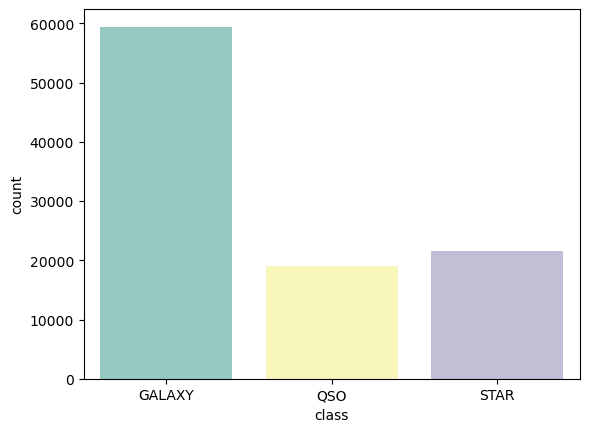

In [37]:
sns.countplot(x = df["class"], palette="Set3")

<a id ='3'></a>
## Preprocessing

#### Missing Value

In [35]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

#### Encoding Categorical Features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [7]:
LE = preprocessing.LabelEncoder()
df['class'] = LE.fit_transform(df['class'])
df['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

In [8]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842


#### Train/Test Split

###### Data Content 
* obj_ID = Nesne Kimliği, CAS tarafından kullanılan görüntü kataloğundaki nesneyi tanımlayan benzersiz değer
* alpha = Sağ Açıklık açısı (J2000 epoksinde)
* delta = Deklina açısı (J2000 epoksinde)
* u = Fotometrik sistemdeki Ultraviyole filtresi
* g = Fotometrik sistemdeki Yeşil filtresi
* r = Fotometrik sistemdeki Kırmızı filtresi
* i = Fotometrik sistemdeki Yakın Kızılötesi filtresi
* z = Fotometrik sistemdeki Kızılötesi filtresi
* run_ID = Belirli taramayı tanımlamak için kullanılan Çalışma Numarası
* rerun_ID = Görüntünün nasıl işlendiğini belirtmek için kullanılan Yeniden Çalışma Numarası
* cam_col = Çalışma içinde tarama çizgisini tanımlamak için Kamera sütunu
* field_ID = Her alanı tanımlamak için Alan numarası
* spec_obj_ID = Optik spektroskopik nesneler için kullanılan benzersiz kimlik (bu, aynı spec_obj_ID'ye sahip 2 farklı gözlemin çıkış sınıfını paylaşması gerektiği anlamına gelir)
* class = Nesne sınıfı (galaksi, yıldız veya kuazar nesnesi)
* redshift = Dalga boyunun artışına dayanan kırmızıya kayma değeri
* plate = SDSS'deki her levhayı tanımlayan levha kimliği
* MJD = Değiştirilmiş Julian Tarihi, belirli bir SDSS verisinin ne zaman alındığını göstermek için kullanılır
* fiber_ID = Her gözlemin odak düzlemine ışığı yönlendiren fiberi tanımlayan fiber kimliği

In [50]:
x =  df.drop(['class','rerun_ID','obj_ID','run_ID','field_ID','spec_obj_ID','fiber_ID','MJD'], axis = 1)
y = df[['class']].values
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.33 , random_state=0)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (67000, 10)
x_test (33000, 10)
y_train (67000, 1)
y_test (33000, 1)


#### Scaling

In [51]:
#Standard Scaler
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

<a id ='4'></a>
# Modeling: Decision Tree and Random Forest Classifiers

In [52]:
#Decision Tree
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [53]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100 ,criterion='entropy')
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

<a id ='5'></a>
# Evaluation of Models

#### Confusion Matrix

In [54]:
#Decision Tree 
cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_dt

array([[17294,  2096,   164],
       [  949,  5281,     2],
       [   18,     0,  7196]], dtype=int64)

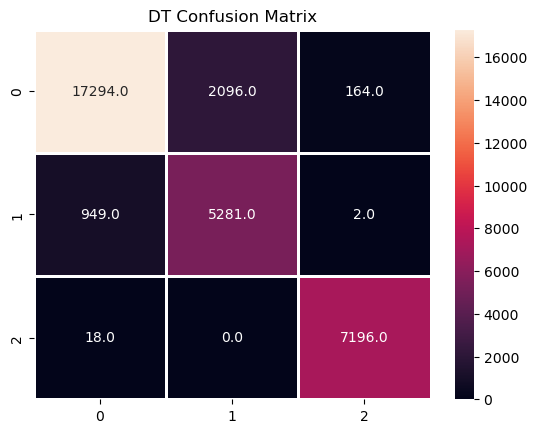

In [56]:
plt.figure()
sns.heatmap(cm_dt, annot = True, linewidth = 0.8, fmt = '.1f')
plt.title('DT Confusion Matrix')
plt.show()

In [57]:
#Random Forest 
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_rf

array([[19219,   165,   170],
       [ 1042,  5188,     2],
       [    1,     0,  7213]], dtype=int64)

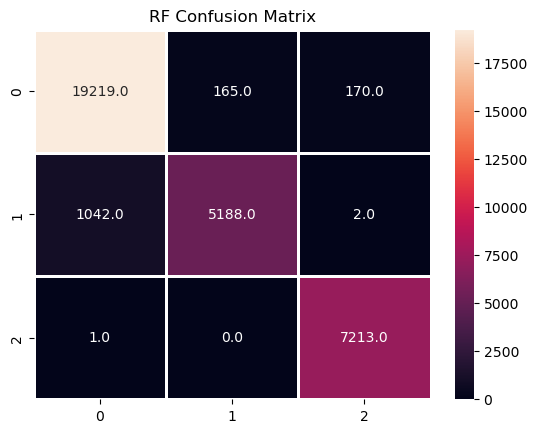

In [58]:
plt.figure()
sns.heatmap(cm_rf, annot = True, linewidth = 0.8, fmt = '.1f')
plt.title('RF Confusion Matrix')
plt.show()

#### Accuracy

In [59]:
#Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.9021515151515151

In [60]:
#Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9581818181818181

# Sonuç
* Bu projede Stellar veri setini kullanarak yıldız sınıflandırması yaptık.
* Sınıflandırma için Decision Tree ve Random Forest algoritmalarını kullandık.
* Sınıflandırma sonrasında algoritmaların başarılarını ölçmek için kullandığımız confusion matrix ve accuracy değerlerine bakarak, Random Forest algoritmasının Decision Tree algoritmasından daha iyi çalıştığı sonucuna vardık.
